# Face Mask Detection

**Author:** Ankitt Kushary  
**Project Type:** Individual  
**Tools:** Python, TensorFlow, OpenCV  

This notebook verifies the environment setup and project structure.


In [17]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [18]:
print("TensorFlow:", tf.__version__)
print("OpenCV:", cv2.__version__)
print("NumPy:", np.__version__)


TensorFlow: 2.13.1
OpenCV: 4.8.1
NumPy: 1.24.3


(-0.5, 99.5, 99.5, -0.5)

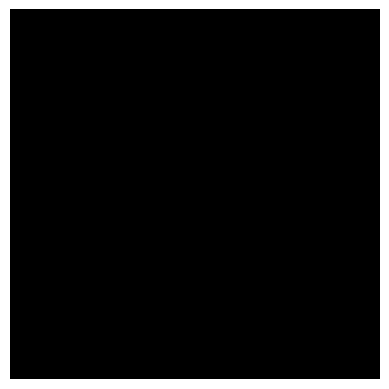

In [19]:
img = np.zeros((100, 100, 3), dtype=np.uint8)
plt.imshow(img)
plt.axis("off")


In [20]:
import os

DATASET_DIR = "../dataset"
WITH_MASK_DIR = os.path.join(DATASET_DIR, "with_mask")
WITHOUT_MASK_DIR = os.path.join(DATASET_DIR, "without_mask")


In [21]:
with_mask_count = len(os.listdir(WITH_MASK_DIR))
without_mask_count = len(os.listdir(WITHOUT_MASK_DIR))

print("With mask images:", with_mask_count)
print("Without mask images:", without_mask_count)


With mask images: 3725
Without mask images: 3828


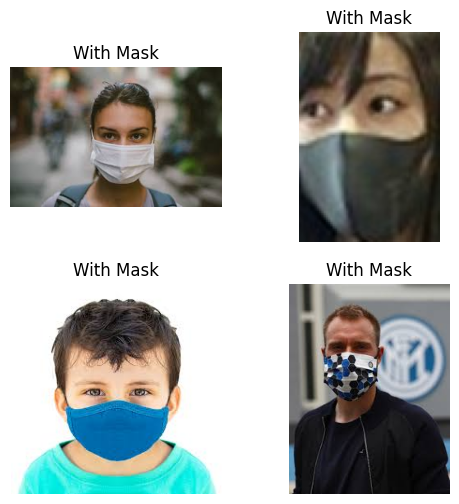

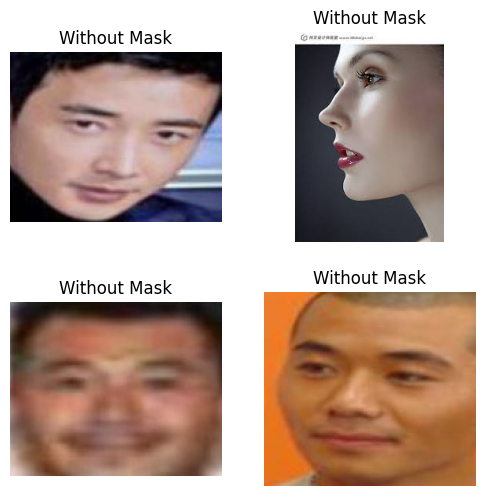

In [22]:
import random
from matplotlib import pyplot as plt

def show_samples(folder, label):
    images = random.sample(os.listdir(folder), 4)
    plt.figure(figsize=(6,6))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2,2,i+1)
        plt.imshow(img)
        plt.title(label)
        plt.axis("off")
    plt.show()

show_samples(WITH_MASK_DIR, "With Mask")
show_samples(WITHOUT_MASK_DIR, "Without Mask")


In [23]:
sample_img = os.listdir(WITH_MASK_DIR)[0]
img = cv2.imread(os.path.join(WITH_MASK_DIR, sample_img))
print("Image shape:", img.shape)


Image shape: (350, 525, 3)


## Dataset Observations

- The dataset contains two classes: with_mask and without_mask.
- Images are of varying resolutions and aspect ratios.
- The number of images in each class is approximately balanced.
- Preprocessing such as resizing and normalization will be required.


In [24]:
IMG_SIZE = 128


In [25]:
X = []
y = []

def load_images(folder, label):
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img)
        y.append(label)

load_images(WITH_MASK_DIR, 1)
load_images(WITHOUT_MASK_DIR, 0)


In [26]:
X = np.array(X, dtype="float32")
y = np.array(y)


In [27]:
X = X / 255.0


In [28]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (7553, 128, 128, 3)
y shape: (7553,)


In [29]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))


{0: 3828, 1: 3725}

## Preprocessing Summary

- All images were resized to 224×224 pixels.
- Pixel values were normalized to the range [0, 1].
- Labels were assigned as:
  - 1 → with_mask
  - 0 → without_mask
- The final dataset was converted into NumPy arrays for CNN training.


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape)
print("Validation samples:", X_val.shape)


Training samples: (6042, 128, 128, 3)
Validation samples: (1511, 128, 128, 3)
